# Dependencies and const

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

%matplotlib inline

In [4]:
sns.set(style="whitegrid")

# Load tests data

In [5]:
test_name = "Test0"

In [6]:
functions_numbers = list(range(1,10+1))

In [7]:
versions_names = ["classic", "marriage-max", "marriage-min", "marriage-mean"]

# Preprocessing functions

In [8]:
def print_trials_vs_function(tests_names):
    # We can run many tests, and want to join results.
    # Eg we can run functions 0-14 25 time each, and the others only 3 times each
    # becouse of running time.
    filescounts = pd.DataFrame(np.zeros((len(functions_numbers),
                                         len(versions_names)), 
                                         dtype = int),
                              columns = versions_names,
                              index = functions_numbers)
    for test_name in tests_names:
        for function_number in functions_numbers:
            for version_name in versions_names:
                # Assuming that if there are "scores" there is "history" as well
                file = "../{0}_benchmark_f{1}_{2}_scores.npy".format(
                                test_name, function_number, version_name)
                if(os.path.isfile(file)):
                    filescounts[version_name][function_number] += 1
    print(filescounts)

In [9]:
def load_covergence_data(tests_names, function_number, version_name):
    def load_histories_to_df(histories):
        dataframes = []
        for hist_id, history in enumerate(histories):
            history_T = np.array(history).T
            dataframes.append(pd.DataFrame(columns = [hist_id], 
                         index=history_T[0],
                         data=history_T[1]))
        df = pd.concat(dataframes, axis=1)
        #fill NaNs with value before
        df.fillna(method='ffill',inplace=True)
        return df
    histories = []
    for test_name in tests_names:
        file = "../{0}_benchmark_f{1}_{2}_histories.npy".format(
                            test_name, function_number, version_name)
        if not os.path.isfile(file):
            print("Nie znaleziono pliku: {0}".format(file))
            continue
        histories += np.load(file).tolist()
    df = load_histories_to_df(histories)
    return df

In [10]:
def print_covergence_graphs(tests_names,agg_function=np.mean, 
                            y_scale = 'log', x_scale = 'log'):
    for function_number in functions_numbers:
        plt.figure()
        ax = plt.axes()
        ax.ticklabel_format(style='plain')
        ax.set_yscale(y_scale)
        ax.set_xscale(x_scale)
        #if(x_scale=='log'):
        #    ax.set_xlim(left=1.0)
        plt.title("Testy dla F{0}".format(function_number))
        for version_name in versions_names:
            df = load_covergence_data(tests_names, function_number, 
                                                    version_name)
            agg = df.apply(agg_function,axis=1)
            agg.plot(grid=True)
            #index = covergence_graph.index
            #vals = covergence_graph.values.T[0]
            #plt.plot(index, vals)
        plt.legend(versions_names)

In [11]:
def load_scores_data(tests_names, function_number, version_name):
    scores = []
    for test_name in tests_names:
        file = "../{0}_benchmark_f{1}_{2}_scores.npy".format(
                            test_name, function_number, version_name)
        if not os.path.isfile(file):
            print("Nie znaleziono pliku: {0}".format(file))
            continue
        scores += np.load(file).tolist()
    return scores

In [12]:
def comp_tables(tests_names, agg_function=np.mean):
    data = []
    for function_number in functions_numbers:
        row = []
        for version_name in versions_names:
            agg = agg_function(load_scores_data(tests_names, function_number, version_name))
            row.append(agg)
        data.append(row)
    df = pd.DataFrame(index=functions_numbers, columns=versions_names, data=data)
    return df

In [13]:
def compare_by_rank(tests_names, agg_function=np.mean):
    comp_df = comp_tables(tests_names, agg_function)
    ranked_df = comp_df.rank(axis=1)
    means = ranked_df.mean(axis=0)
    means.name = "means"
    ranked_df = ranked_df.append(means)
    return ranked_df

In [14]:
def print_boxplots(tests_names, versions_to_drop = None):
    for function_number in functions_numbers:
        plt.figure()
        ax = plt.axes()
        plt.title("Testy dla F{0}".format(function_number))
        
        ver_to_scores = dict()
        for version_name in versions_names:
            ver_to_scores[version_name] = load_scores_data(tests_names, function_number, 
                                                    version_name)
        df = pd.DataFrame(ver_to_scores)
        if versions_to_drop:
            df = df.drop(versions_to_drop, axis=1)
        sns.boxplot(data = df)
        #df.boxplot()

# Results

In [16]:
print_trials_vs_function(["Test0"])

    classic  marriage-max  marriage-min  marriage-mean
1         1             1             1              1
2         1             1             1              1
3         1             1             1              1
4         1             1             1              1
5         1             1             1              1
6         1             1             1              1
7         1             1             1              1
8         1             1             1              1
9         1             1             1              1
10        1             1             1              1


In [17]:
comp_tables(["Test0"], np.mean)

,classic,marriage-max,marriage-min,marriage-mean
1,0.006422,0.000225,7.320824e-08,0.000053
2,0.022434,0.005337,1.109434e-04,0.003213
3,35705.320193,26340.063870,8.087617e+03,12781.285836
4,11534.454326,2755.960853,4.724228e-04,0.006171
5,8.952324,0.832189,1.572100e-01,0.518720
6,7.669899,7.715719,5.299923e+00,7.949823
7,0.079501,14.973255,2.216256e+01,19.062802
8,20.201235,20.746726,2.009393e+01,20.653838
9,40.133357,37.808344,2.852210e+01,37.476666
10,99.832673,73.958417,5.206921e+01,77.606226


In [18]:
comp_tables(["Test0"], np.min)

,classic,marriage-max,marriage-min,marriage-mean
1,0.006340,0.000081,7.096481e-09,0.000043
2,0.013284,0.004969,5.201818e-05,0.000642
3,4527.233609,19387.843967,3.681079e+03,6895.401134
4,7442.157549,1911.808257,3.493608e-04,0.002348
5,8.361742,0.431548,9.396481e-03,0.462831
6,7.562049,7.671317,4.967533e+00,7.066841
7,0.069975,6.543338,1.271171e+01,13.750687
8,20.172585,20.708510,2.006143e+01,20.614979
9,24.877744,17.909297,1.989914e+01,15.919378
10,81.592593,66.661947,2.885374e+01,36.813451


In [19]:
comp_tables(["Test0"], np.max)

,classic,marriage-max,marriage-min,marriage-mean
1,0.006543,0.000421,1.933401e-07,0.000059
2,0.032444,0.005876,2.137287e-04,0.005010
3,77441.783263,37423.873314,1.158157e+04,19448.895383
4,17621.711632,3806.232965,6.941302e-04,0.009926
5,9.706006,1.033637,3.997552e-01,0.607245
6,7.840345,7.753169,5.683273e+00,9.578533
7,0.087294,26.211924,3.549104e+01,28.962043
8,20.221237,20.784447,2.013468e+01,20.697693
9,48.755308,51.737708,3.979828e+01,56.712323
10,112.434405,82.581351,7.860106e+01,127.353253


In [20]:
compare_by_rank(["Test0"], np.mean)

,classic,marriage-max,marriage-min,marriage-mean
1,4.0,3.0,1.0,2.0
2,4.0,3.0,1.0,2.0
3,4.0,3.0,1.0,2.0
4,4.0,3.0,1.0,2.0
5,4.0,3.0,1.0,2.0
6,2.0,3.0,1.0,4.0
7,1.0,2.0,4.0,3.0
8,2.0,4.0,1.0,3.0
9,4.0,3.0,1.0,2.0
10,4.0,2.0,1.0,3.0


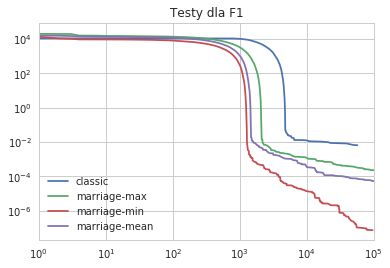

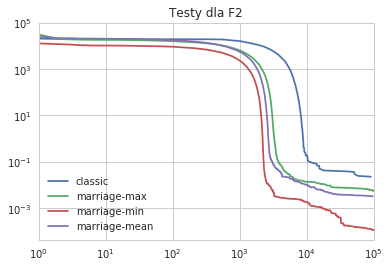

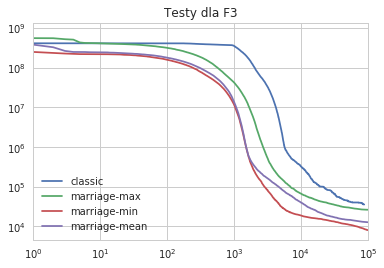

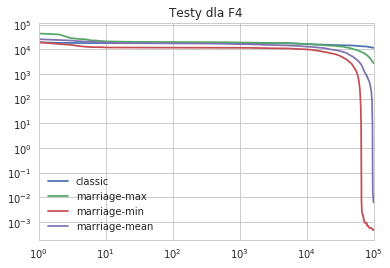

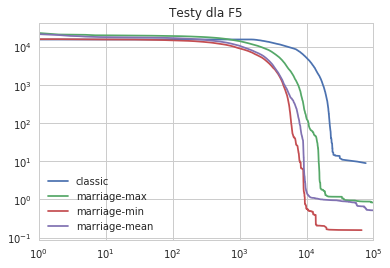

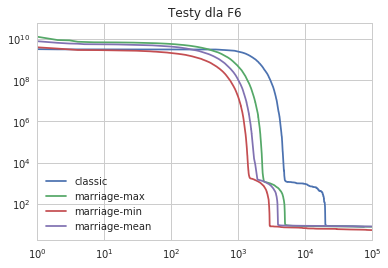

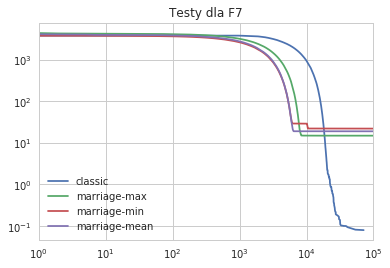

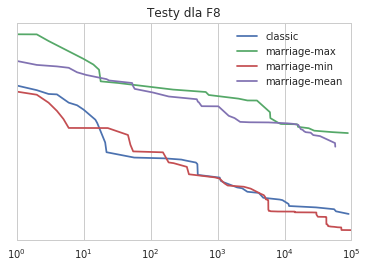

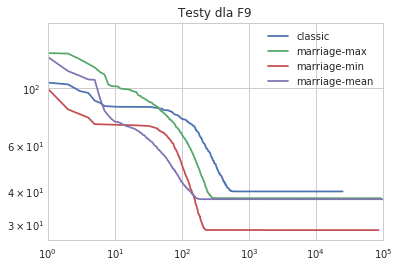

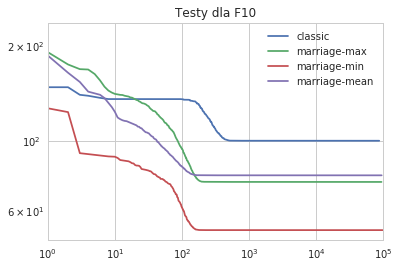

In [174]:
print_covergence_graphs(["Test0"], np.mean)

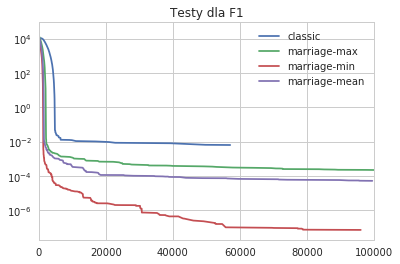

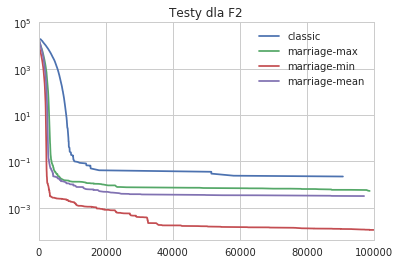

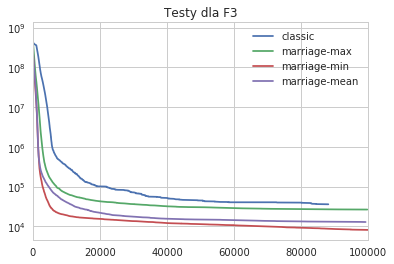

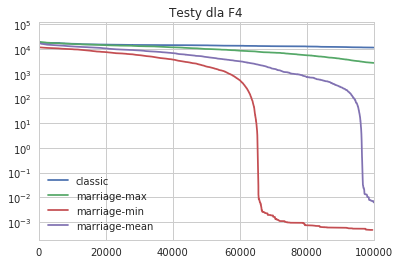

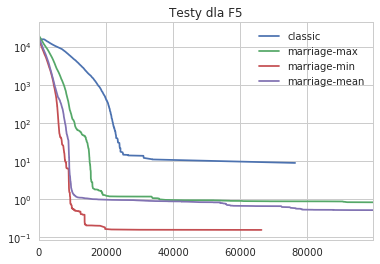

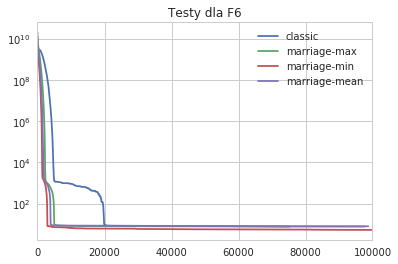

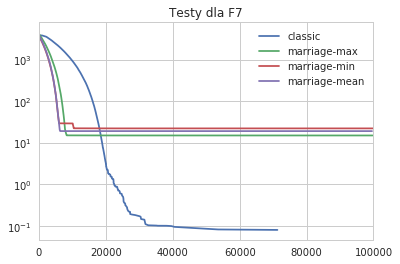

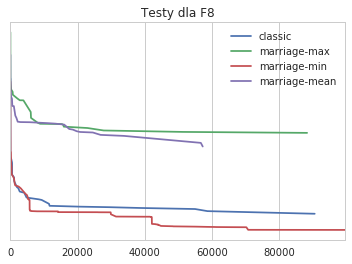

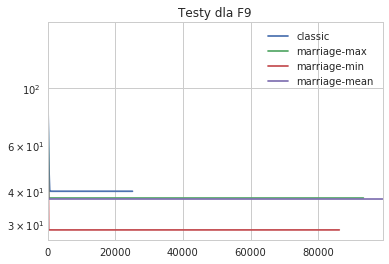

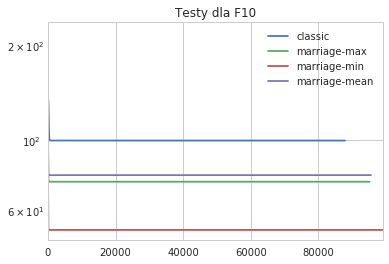

In [234]:
print_covergence_graphs(["Test0"], np.mean, x_scale='linear')

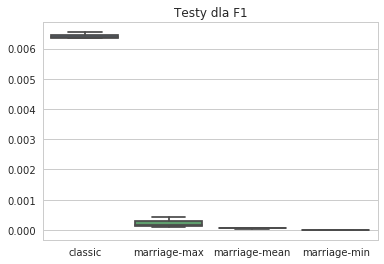

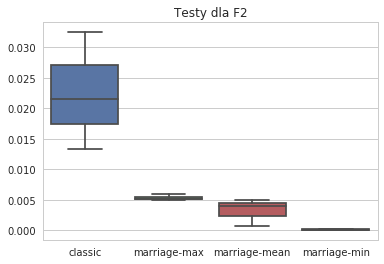

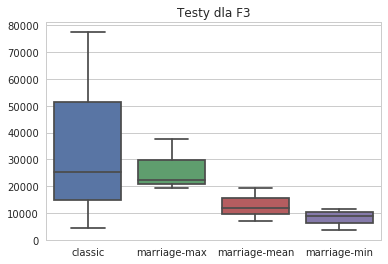

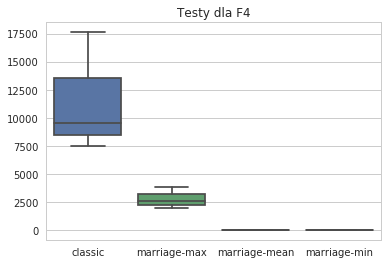

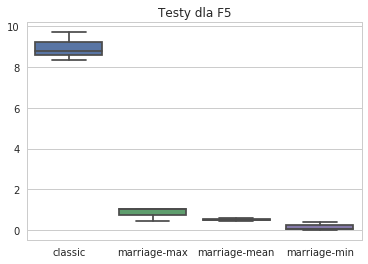

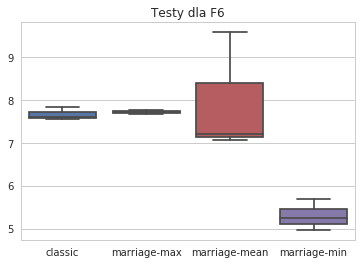

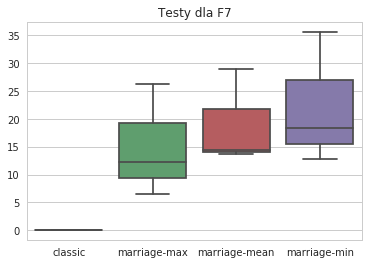

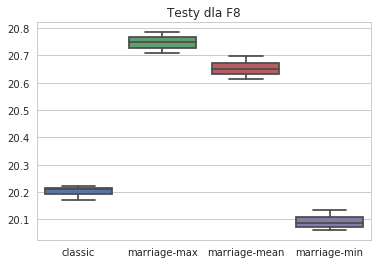

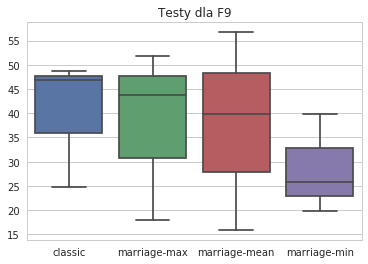

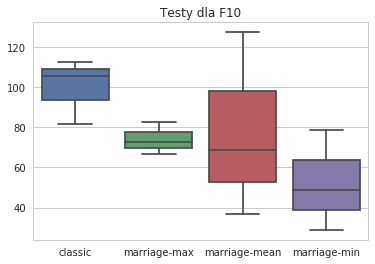

In [177]:
print_boxplots(["Test0"])

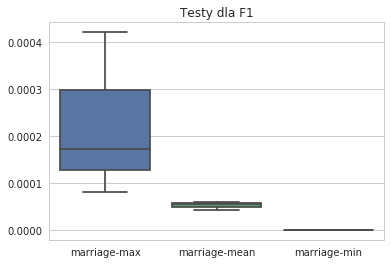

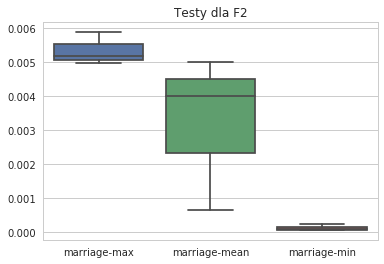

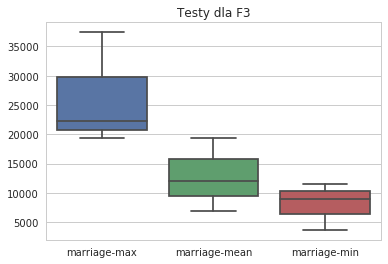

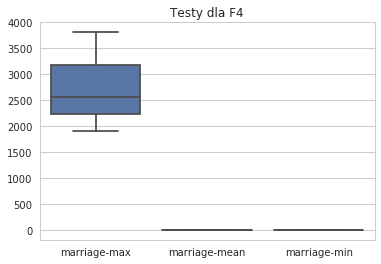

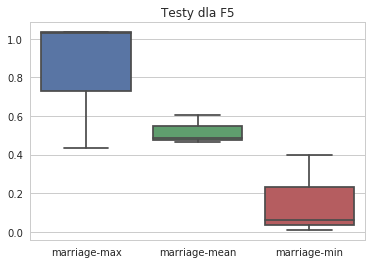

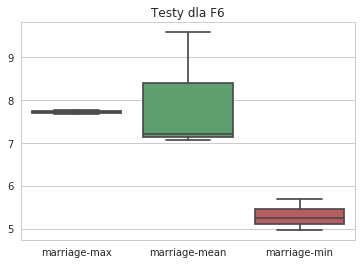

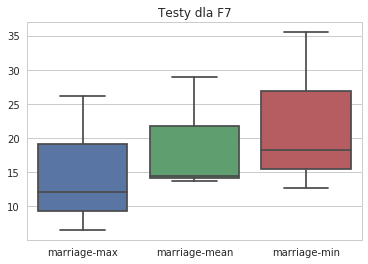

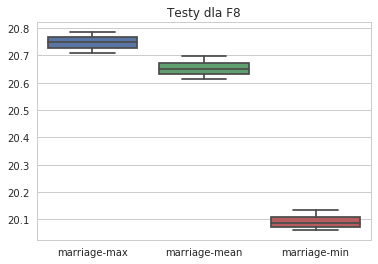

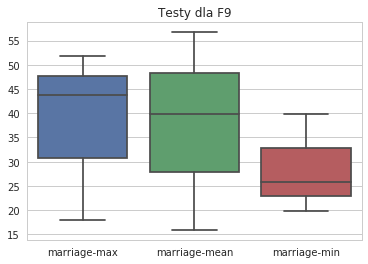

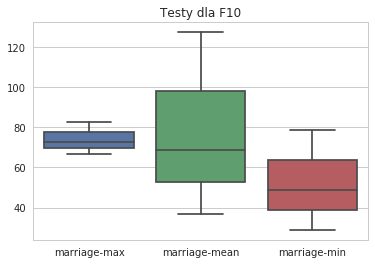

In [176]:
print_boxplots(["Test0"], versions_to_drop=["classic"])